#The following part was code for lab4. Please scroll down few cells to reach the code for lab 5. Thank you.

**Preparing for data collecting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Improting necessary Libraries**

In [2]:
import pandas as pd
import numpy as np

**Load dataset**

In [3]:
gld_ds = pd.read_csv("/content/drive/MyDrive/Gold Price Prediction Dataset.csv", delimiter=",")

gld_ds['Date'] = pd.to_datetime(gld_ds['Date'], format='%d-%m-%y')

#Removing null values

In [4]:
gld_ds.dropna(inplace=True)

#Removing duplicate rows (if present)

In [5]:
gld_ds.duplicated().sum()

0

#Handling categorical variables

In [6]:
gld_ds = pd.get_dummies(gld_ds, columns=['EU_Trend', 'OF_Trend'])

#Scale featuring

In [7]:
X = gld_ds.drop('Adj Close', axis=1)
y = gld_ds['Adj Close']

from sklearn.model_selection import train_test_split
X_trd_n, X_ts_vl, y_train, y_tst= train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scld_clmns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume']

X_trd_n[scld_clmns] = scaler.fit_transform(X_trd_n[scld_clmns])

X_ts_vl[scld_clmns] = scaler.transform(X_ts_vl[scld_clmns])

print("min aftr scalling:\n", X_trd_n[scld_clmns].min(axis=0))
print("max aftr scalling:\n", X_trd_n[scld_clmns].max(axis=0))

min aftr scalling:
 Open        -1.502660
High        -1.519915
Low         -1.522109
Close       -1.526079
Volume      -1.384082
SP_open     -1.930776
SP_high     -1.939469
SP_low      -1.964517
SP_close    -1.974462
OF_Price    -1.805794
OF_Open     -1.806156
OF_High     -1.807619
OF_Low      -1.806407
OF_Volume   -2.436831
dtype: float64
max aftr scalling:
 Open          2.677738
High          2.681978
Low           2.713715
Close         2.702393
Volume       17.027640
SP_open       1.992387
SP_high       1.985758
SP_low        1.996706
SP_close      2.006785
OF_Price      1.830842
OF_Open       1.830153
OF_High       1.831180
OF_Low        1.824804
OF_Volume     3.832453
dtype: float64


#Removing features

In [8]:
# Correlation analysis
cult_mtrx = gld_ds.corr()
qlt_corr = cult_mtrx['Adj Close'].sort_values(ascending=False)
print("Correlation of features with 'Adj Close':\n", qlt_corr)

trshld = 0.3
drp_ft = qlt_corr[abs(qlt_corr) < trshld].index
gld_ds_droped = gld_ds.drop(drp_ft, axis=1)
print("Fetaurs dropped:\n", drp_ft)
print(gld_ds_droped.head())

Correlation of features with 'Adj Close':
 Close         1.000000
Adj Close     1.000000
High          0.999528
Low           0.999524
Open          0.998966
OF_High       0.704934
OF_Price      0.704395
OF_Open       0.702735
OF_Low        0.701914
Volume        0.245870
OF_Trend_A    0.046419
EU_Trend_A    0.018724
EU_Trend_B   -0.018724
OF_Trend_B   -0.046419
OF_Volume    -0.213694
SP_Ajclose   -0.654001
SP_low       -0.671783
SP_close     -0.672353
SP_open      -0.672677
SP_high      -0.672963
Date         -0.674981
Name: Adj Close, dtype: float64
Fetaurs dropped:
 Index(['Volume', 'OF_Trend_A', 'EU_Trend_A', 'EU_Trend_B', 'OF_Trend_B',
       'OF_Volume'],
      dtype='object')
         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   


**Plotting**

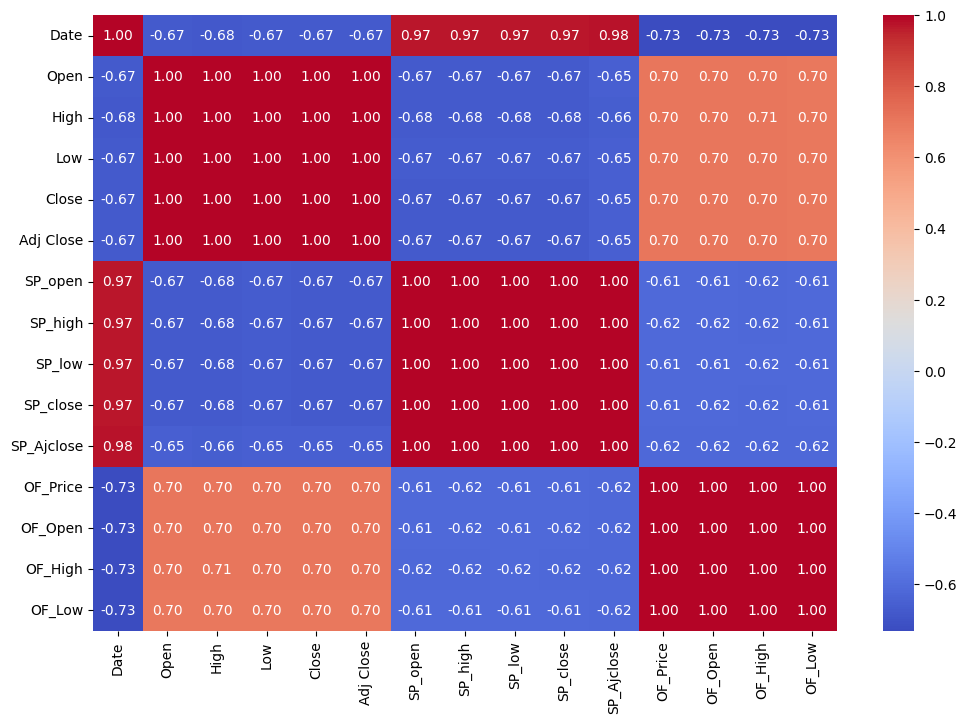

In [9]:
cult_mtrx_dropped = gld_ds_droped.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cult_mtrx_dropped, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Code for lab 5 begins below. The code is divide into different sections as per the instrcutions on discord for better readability.

**Improting neccesary Libraries**

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Handling  'date'  type

In [11]:
X_trd_n['Date'] = pd.to_datetime(X_trd_n['Date'], format='%d-%m-%y')
X_ts_vl['Date'] = pd.to_datetime(X_ts_vl['Date'], format='%d-%m-%y')

X_trd_n['Year'] = X_trd_n['Date'].dt.year
X_trd_n['Month'] = X_trd_n['Date'].dt.month
X_trd_n['Day'] = X_trd_n['Date'].dt.day

X_ts_vl['Year'] = X_ts_vl['Date'].dt.year
X_ts_vl['Month'] = X_ts_vl['Date'].dt.month
X_ts_vl['Day'] = X_ts_vl['Date'].dt.day

X_tr = X_trd_n.drop(columns=['Date'])
Xtst = X_ts_vl.drop(columns=['Date'])

**Applying Linear Regression**

In [12]:
lnr_md = LinearRegression()
y_trd = y_train
lnr_md.fit(X_tr, y_trd)
y_prd_val = lnr_md.predict(Xtst)

mse_flt = mean_squared_error(y_tst, y_prd_val)
rmse_flt = np.sqrt(mse_flt)
print(f"MSE: {mse_flt}")
print(f"RMSE: {rmse_flt}")

MSE: 2.6954170638252813e-27
RMSE: 5.1917406173895874e-14


**Visualizing Linear Regression Results**

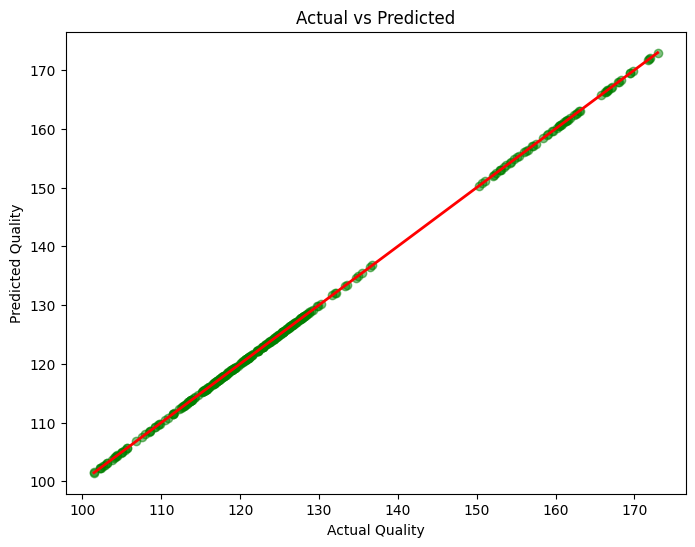

In [13]:
plt.figure(figsize=(8, 6))
wrkn_y_t = y_tst
plt.scatter(wrkn_y_t, y_prd_val, alpha=0.5, color="green")
plt.plot([min(wrkn_y_t), max(wrkn_y_t)], [min(wrkn_y_t), max(wrkn_y_t)], color="red", linewidth=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

**Converting Continuous Output to Categorical for Logistic Regression**

In [14]:
trshld = np.percentile(y_trd, 90)
y_trd = np.where(y_trd >= trshld, 1, 0)
wrkn_y_t = np.where(wrkn_y_t >= trshld, 1, 0)

**Applying Logistic Regression**

In [15]:
lgt_mdl = LogisticRegression(max_iter=5000)
lgt_mdl.fit(X_tr, y_trd)
y_pdrct_cls = lgt_mdl.predict(Xtst)

**Evaluating Logistic Regression Model**

In [16]:
accuracy = accuracy_score(wrkn_y_t, y_pdrct_cls)
print(f"Logistic Regression Accuracy: {accuracy}")
prcs = precision_score(wrkn_y_t, y_pdrct_cls, zero_division=1)
rl = recall_score(wrkn_y_t, y_pdrct_cls, zero_division=1)
f1 = f1_score(wrkn_y_t, y_pdrct_cls, zero_division=1)

print(f"Precision: {prcs}")
print(f"Recall: {rl}")
print(f"F1-score: {f1}")

print("Accuracy in meantime of being trained: {:.2f}".format(lgt_mdl.score(X_tr, y_trd)))
print("Accuracy in meantime of being trained: {:.2f}".format(lgt_mdl.score(Xtst, wrkn_y_t)))


Logistic Regression Accuracy: 0.9852941176470589
Precision: 0.9166666666666666
Recall: 0.9428571428571428
F1-score: 0.9295774647887324
Accuracy in meantime of being trained: 0.99
Accuracy in meantime of being trained: 0.99


**Visualizing Confusion Matrix for Logistic Regression**

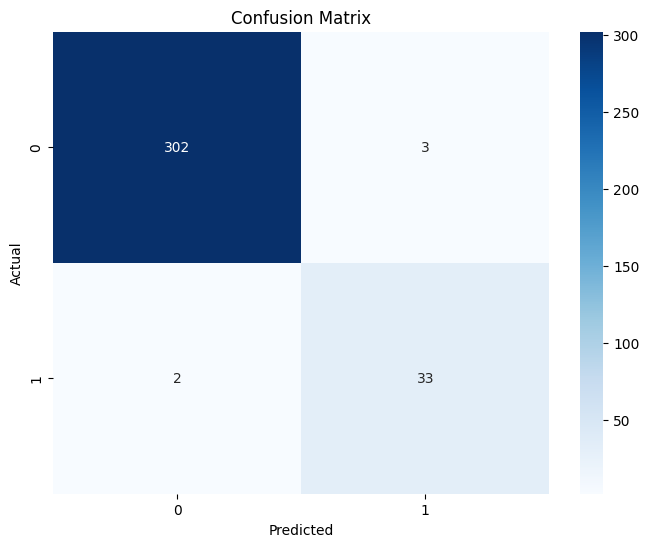

In [17]:
cmt_ins = confusion_matrix(wrkn_y_t, y_pdrct_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cmt_ins, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()